In [239]:
import csv
import pandas
import matplotlib.pyplot as plt
import matplotlib
import collections

## 2019/05/20 plot crg of pls vs redox state for each structures at one graph

In [240]:
#import data files
file1 = pandas.read_csv(r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip\clustering\PLS\crg_detail_ba3_clustering_PLS.csv")
file2 = pandas.read_csv(r'C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip\clustering\PLS\crg_detail_ba3_clustering_PLS2.csv')
file3 = pandas.read_csv(r'C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip\free_no_water\crg_detail_ba3_xray.csv')

In [241]:
print(file1.shape)
print(file2.shape)
print(file3.shape)

(432, 26)
(720, 26)
(144, 26)


In [242]:
#calculate sum of charges at PLS for each substate and each structures
file1['sum_pls']=file1.iloc[:,1:17].sum(axis=1)
file2['sum_pls']=file2.iloc[:,1:17].sum(axis=1)
file3['sum_pls']=file3.iloc[:,1:17].sum(axis=1)

In [243]:
#reshape the sum_pls, make 12 data one sturctue
n1=file1['sum_pls'].size
n2=file2['sum_pls'].size
n3=file3['sum_pls'].size
data1=file1['sum_pls'].values.reshape([n1//12,12])
data2=file2['sum_pls'].values.reshape([n2//12,12])
data3=file3['sum_pls'].values.reshape([n3//12,12])

In [244]:
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]
states=[file1['state_snap'], file2['state_snap'], file3['state_snap']]

color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
colors=[]
for i in range(len(states)):
    color=[]
    for j in range(0,len(states[i]), 12):
        for key, value in color_map.items(): 
            if key in states[i][j]:
                color.append(value)
                break
        if all(key not in states[i][j] for key in color_map):
            color.append("blue")
    colors.append(color)

print(colors)


[['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'purple', 'purple', 'green', 'green', 'cyan', 'cyan'], ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan'], ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']]


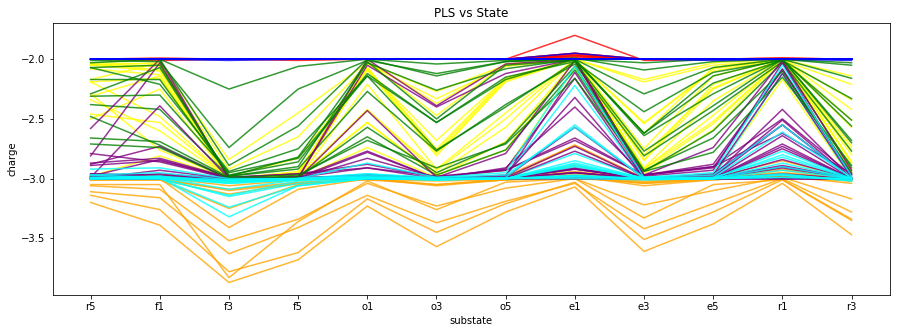

In [245]:
#plot the pls crg set
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#marker= ['^','o','v','X','s','*','<']
x_label=['r5','f1','f3','f5','o1','o3','o5','e1','e3','e5','r1', 'r3']


plt.figure(figsize=(15, 5))
plt.xticks(list(range(12)),x_label)
data=[data1,data2, data3]
for i,datai in enumerate(data):
    for j, struc in enumerate(datai):     
        plt.plot(struc,label=str(i)+str(j), alpha=0.8, color=colors[i][j])
        #plt.legend()
        #plt.ylim(-5.0,2.0)
plt.title('PLS vs State')
plt.xlabel('substate')
plt.ylabel('charge')
plt.savefig(outputpathway+'/'+'All_Crg_State_ba3_clustering.png', dpi=300)
plt.show()

#plt.clf()

#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

# 2019/04522 plot Energy terms if vs Structure at one graph for E1 substate


In [285]:
#import crystal data files
filepath_cry='/Users/PC/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/free_no_water/all_ms_E.xlsx'
file_cry = pandas.read_excel(filepath_cry, sheetname=None, index_col=1)

md_labels=['p10', 'p20', 'p30', 'p40']

#minEms=[]
#E[-4]-E[-3]
deltaE_cry=[]
deltaselfE_cry=[]
deltapw_cry=[]
deltamfe_cry=[]
strucs_cry=[]
E3_cry=[]
E4_cry=[]
E3_cry_crgstate=[]
E4_cry_crgstate=[]
for name, sheet in file_cry.items():
    if all( s not in name for s in color_map) and all(y not in name for y in md_labels ):
        sheet=sheet.iloc[:7]
        strucs_cry.append(name)
        E3_cry.append(sheet['Min_E(Kcal)'][2])
        E4_cry.append(sheet['Min_E(Kcal)'][1])
        E3_cry_crgstate.append(sheet['Crg_seq'][2])
        E4_cry_crgstate.append(sheet['Crg_seq'][1])
        deltaE_cry.append(sheet['Min_E(Kcal)'][1]-sheet['Min_E(Kcal)'][2])
        deltaselfE_cry.append(sheet['E_self(Kcal)'][1]-sheet['E_self(Kcal)'][2])
        deltapw_cry.append(sheet['E_pw(Kcal)'][1]-sheet['E_pw(Kcal)'][2])
        deltamfe_cry.append((sheet['E_mfe(Kcal)'][1]-sheet['E_mfe(Kcal)'][2])*2)
        #print(sheet)


In [286]:
print(strucs_cry)
print(len(deltaE_cry))

['1ehk', '1xme', '4gp4', '4gp5', '3eh3', '3eh5', '3s3b', '3s3d', '3eh4', '3s3a', '3s3c', '3s8f']
12


In [287]:
#import data files
filepath='/Users/PC/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/clustering/PLS/all_ms_E_e1.xlsx'

file = pandas.read_excel(filepath, sheetname=None, index_col=1)

minEms=[]
#E[-4]-E[-3]
deltaE=[]
deltaselfE=[]
deltapw=[]
deltamfe=[]
strucs=[]
E3=[]
E4=[]
E3_crgstate=[]
E4_crgstate=[]
for name, sheet in file.items():
    sheet=sheet.iloc[:7]
    strucs.append(name)
    E3.append(sheet['Min_E(Kcal)'][2])
    E4.append(sheet['Min_E(Kcal)'][1])
    E3_crgstate.append(sheet['Crg_seq'][2])
    E4_crgstate.append(sheet['Crg_seq'][1])
    deltaE.append(sheet['Min_E(Kcal)'][1]-sheet['Min_E(Kcal)'][2])
    deltaselfE.append(sheet['E_self(Kcal)'][1]-sheet['E_self(Kcal)'][2])
    deltapw.append(sheet['E_pw(Kcal)'][1]-sheet['E_pw(Kcal)'][2])
    deltamfe.append((sheet['E_mfe(Kcal)'][1]-sheet['E_mfe(Kcal)'][2])*2)
    #print(sheet)


In [288]:
#get the proton site change for each structure
#print(E3_crgstate)
#print(E4_crgstate)
diff_crgstate=[]

#fuction to read crg_seq from string into crg set
def crgstringtolist(crg_s: str)->list:
    n=len(crg_s)
    i=0
    res=[]
    while i < n:
        if crg_s[i]=='1':
            res.append(1)
            i +=1
        elif crg_s[i]=='0':
            res.append(0)
            i +=1
        else:
            res.append(int(crg_s[i:i+2]))
            i +=2
    return res

# for md structures
for i in range(len(E3_crgstate)):
    E3_crglist=crgstringtolist(E3_crgstate[i])
    E4_crglist=crgstringtolist(E4_crgstate[i])
    diff_list=[x1 - x2 for (x1, x2) in zip(E3_crglist, E4_crglist)]
    diff_crgstate.append(''.join(str(x) for x in diff_list))
print(len(diff_crgstate))

96


In [250]:
# for crystal structures
diff_cry_crgstate=[]
for i in range(len(E3_cry_crgstate)):
    E3_cry_crglist=crgstringtolist(E3_cry_crgstate[i])
    E4_cry_crglist=crgstringtolist(E4_cry_crgstate[i])
    diff_cry_list=[x1 - x2 for (x1, x2) in zip(E3_cry_crglist, E4_cry_crglist)]
    diff_cry_crgstate.append(''.join(str(x) for x in diff_cry_list))
print(len(diff_cry_crgstate))

12


In [289]:
# join crystal structure data to md structure data
strucs.extend(strucs_cry)
E3.extend(E3_cry)
E4.extend(E4_cry)
E3_crgstate.extend(E3_cry_crgstate)
E4_crgstate.extend(E4_cry_crgstate)
deltaE.extend(deltaE_cry)
deltapw.extend(deltapw_cry)
deltaselfE.extend(deltaselfE_cry)
deltamfe.extend(deltamfe_cry)
diff_crgstate.extend(diff_cry_crgstate)


In [290]:
len(E4_cry_crgstate)

12

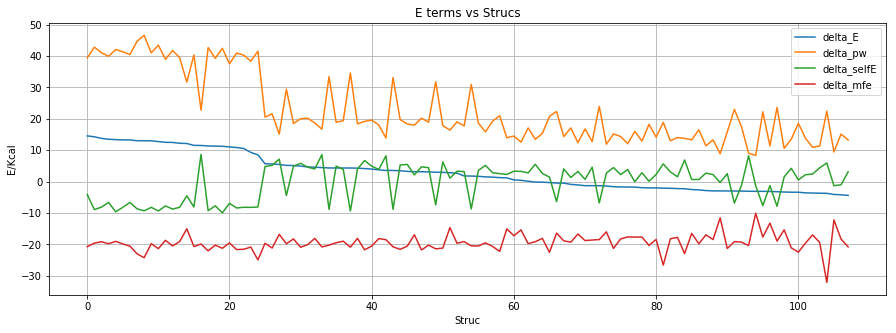

In [291]:
#plot the Energy terms vs structure
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

#marker= ['^','o','v','X','s','*','<']
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
sorted_data=sorted(list(zip(*data)), key= lambda x: x[3], reverse=True)
#print(sorted_data)
sorted_data=list(zip(*sorted_data))
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
for i,datai in enumerate(sorted_data[3:]):    
    plt.plot(datai,label= labels[i], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True)
plt.show()

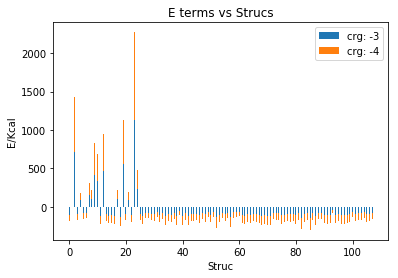

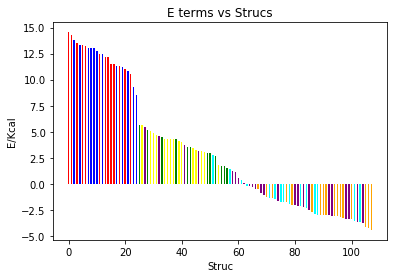

In [292]:
labels=["-3", "-4"]
width=0.35
#print(sorted_data[1:3][0][0],sorted_data[1:3][1][0] )
p1 = plt.bar(list(range(len(sorted_data[1]))), sorted_data[1], width)
p2 = plt.bar(list(range(len(sorted_data[2]))), sorted_data[2], width, sorted_data[1] )
plt.legend((p1[0], p2[0]), ('crg: -3', 'crg: -4'))
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
#plt.grid(True)
plt.show()

##color each structure
color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
color_label=["orange","purple", "green","cyan","yellow","red","blue"]
colors=[]
for j in range(len(sorted_data[0])):
    for key, value in color_map.items(): 
        if key in sorted_data[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data[0][j] for key in color_map):
        colors.append("blue")


outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#another way to show gap
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.figure()
#plt.figure(figsize=(15, 5))
plt.bar(list(range(len(sorted_data[3]))), sorted_data[3], width=0.5, color=colors )
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')



#plt.grid(True)
plt.savefig(outputpathway+'/'+'All_strucs_dE_ba3_clustering.png', dpi=300)
plt.show()


In [293]:
for x in zip(* sorted_data):
    print(x[0], x[3])


d372ph376p_456_frame 14.5472412109375
d372ph376p_55_frame 14.265899658203097
3eh4 13.7607421875
d372ph376p_141_frame 13.474533081054688
1ehk 13.360450744628906
d372ph376p_404_frame 13.287445068359375
d372ph376p_288_frame 13.253036499023438
3s3b 13.017074584960994
3s3d 13.00411987304679
3eh5 12.991516113281307
3s8f 12.734191894531193
d372ph376p_166_frame 12.508026123046903
4gp4 12.467864990234318
d372ph376p_368_frame 12.202041625976562
d372ph376p_432_frame 12.128540039062614
d372ph376p_68_frame 11.5332870483399
d372ph376p_411_frame 11.501182556152287
1xme 11.339096069336009
d372ph376p_255_frame 11.291549682617216
4gp5 11.2421875
d372ph376p_468_frame 11.037399291992188
3s3a 10.846885681152315
d372ph376p_243_frame 10.545928955078182
3eh3 9.28930664062591
3s3c 8.513229370117216
p3_190_frame 5.6747283935546875
d372p_151_frame 5.60295867919919
p2_139_frame 5.4574127197265625
p3_435_frame 5.152229309082031
d372p_365_frame 5.119712829589844
d372p_207_frame 4.920989990234375
d372p_287_frame 4.6

## snapshots chosen:
## 3eh4 13.7607421875 / 3s8f 12.734191894531193
## d372ph376p_166_frame 12.508026123046903

## d372p_151_frame 5.60295867919919
## p2_139_frame 5.4574127197265625
## p3_435_frame 5.152229309082031
## d372p_207_frame 4.920989990234375
## p2_145_frame 4.561737060546918
## d372p_253_frame 4.328987121582031
## p3_98_frame 3.5489120483399006
## p3_443_frame 2.9347839355469034
## p3_226_frame 1.7583389282226562
## p2_25_frame 1.2615890502929688

## p4_153_frame 0.41042327880860796
## p2_277_frame 0.12345886230470171
## p2_185_frame -0.3127593994140625
## p2_432_frame -1.0724716186524006

## p4_32_frame -2.2773284912109375
## p1_188_frame -3.1038818359375

## p1_428_frame -4.098793029785156


# plot deltaE with detailed energy terms, category by residue that get proton


108
[1.5, 2.5, 32.5, 65.5, 72.5, 105.5]
['0110-10', '0101-10', '010000', '001000', '000100', '000010', '000001']


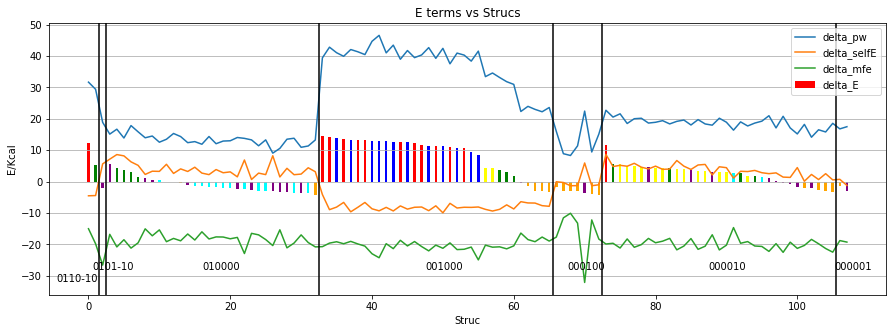

In [294]:
#category by which residue get protonated
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4, E3_crgstate, E4_crgstate, diff_crgstate, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
#print(len(data[4]))

sorted_data2=sorted(list(zip(*data)), key= lambda x:(x[5], x[6]), reverse=True)
sorted_data2=list(zip(*sorted_data2))


##color each structure
color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}

colors=[]

for j in range(len(sorted_data2[0])):
    for key, value in color_map.items(): 
        if key in sorted_data2[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data2[0][j] for key in color_map):
        colors.append("blue")
print(len(colors))

#get the division line for each category
vlines=[]
vline_labels=[]
for i,x in enumerate(sorted_data2[5][:-1]):
    if sorted_data2[5][i] !=sorted_data2[5][i+1]:
        vlines.append(i+0.5)
        vline_labels.append(sorted_data2[5][i])
vline_labels.append(sorted_data2[5][-1])
print(vlines)
print(vline_labels)

labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.bar(list(range(len(sorted_data2[6]))), sorted_data2[6], width, label= labels[0], color=colors)
for i,datai in enumerate(sorted_data2[7:]):    
    plt.plot(datai,label= labels[i+1], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
for i, xc in enumerate(vlines):
    plt.axvline(x=xc, color='k', linestyle='-')
    if i==0: plt.text(vlines[i]-6,-32,vline_labels[i])
    else: plt.text((vlines[i-1]+vlines[i])/2-1.5,-28,vline_labels[i])
plt.text((len(sorted_data2[6])+vlines[-1])/2-1.5,-28,vline_labels[-1])
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True, axis='y')
plt.savefig(outputpathway+'/'+'All_strucs_cat_E_clustering_e1.png', dpi=300)
plt.show()


# plot Energy terms if vs Structure at one graph for f3 substate


In [303]:
#import crystal data files
filepath_cry='/Users/PC/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/free_no_water/all_ms_E_f3.xlsx'
file_cry = pandas.read_excel(filepath_cry, sheetname=None, index_col=1)

md_labels=['p10', 'p20', 'p30', 'p40']

#minEms=[]
#E[-4]-E[-3]
deltaE_cry=[]
deltaselfE_cry=[]
deltapw_cry=[]
deltamfe_cry=[]
strucs_cry=[]
E3_cry=[]
E4_cry=[]
E3_cry_crgstate=[]
E4_cry_crgstate=[]
for name, sheet in file_cry.items():
    if all( s not in name for s in color_map) and all(y not in name for y in md_labels ):
        sheet=sheet.iloc[:7]
        strucs_cry.append(name)
        E3_cry.append(sheet['Min_E(Kcal)'][2])
        E4_cry.append(sheet['Min_E(Kcal)'][1])
        E3_cry_crgstate.append(sheet['Crg_seq'][2])
        E4_cry_crgstate.append(sheet['Crg_seq'][1])
        deltaE_cry.append(sheet['Min_E(Kcal)'][1]-sheet['Min_E(Kcal)'][2])
        deltaselfE_cry.append(sheet['E_self(Kcal)'][1]-sheet['E_self(Kcal)'][2])
        deltapw_cry.append(sheet['E_pw(Kcal)'][1]-sheet['E_pw(Kcal)'][2])
        deltamfe_cry.append((sheet['E_mfe(Kcal)'][1]-sheet['E_mfe(Kcal)'][2])*2)
        #print(sheet)


In [304]:
#import data files
filepath='/Users/PC/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/clustering/PLS/all_ms_E_f3.xlsx'

file = pandas.read_excel(filepath, sheetname=None, index_col=1)

minEms=[]
#E[-4]-E[-3]
deltaE=[]
deltaselfE=[]
deltapw=[]
deltamfe=[]
strucs=[]
E3=[]
E4=[]
E3_crgstate=[]
E4_crgstate=[]
for name, sheet in file.items():
    sheet=sheet.iloc[:7]
    strucs.append(name)
    E3.append(sheet['Min_E(Kcal)'][2])
    E4.append(sheet['Min_E(Kcal)'][1])
    E3_crgstate.append(sheet['Crg_seq'][2])
    E4_crgstate.append(sheet['Crg_seq'][1])
    deltaE.append(sheet['Min_E(Kcal)'][1]-sheet['Min_E(Kcal)'][2])
    deltaselfE.append(sheet['E_self(Kcal)'][1]-sheet['E_self(Kcal)'][2])
    deltapw.append(sheet['E_pw(Kcal)'][1]-sheet['E_pw(Kcal)'][2])
    deltamfe.append((sheet['E_mfe(Kcal)'][1]-sheet['E_mfe(Kcal)'][2])*2)
    #print(sheet)


In [305]:
#get the proton site change for each structure
#print(E3_crgstate)
#print(E4_crgstate)
diff_crgstate=[]

#fuction to read crg_seq from string into crg set
def crgstringtolist(crg_s: str)->list:
    n=len(crg_s)
    i=0
    res=[]
    while i < n:
        if crg_s[i]=='1':
            res.append(1)
            i +=1
        elif crg_s[i]=='0':
            res.append(0)
            i +=1
        else:
            res.append(int(crg_s[i:i+2]))
            i +=2
    return res

# for md structures
for i in range(len(E3_crgstate)):
    E3_crglist=crgstringtolist(E3_crgstate[i])
    E4_crglist=crgstringtolist(E4_crgstate[i])
    diff_list=[x1 - x2 for (x1, x2) in zip(E3_crglist, E4_crglist)]
    diff_crgstate.append(''.join(str(x) for x in diff_list))
print(len(diff_crgstate))

96


In [306]:
# for crystal structures
diff_cry_crgstate=[]
for i in range(len(E3_cry_crgstate)):
    E3_cry_crglist=crgstringtolist(E3_cry_crgstate[i])
    E4_cry_crglist=crgstringtolist(E4_cry_crgstate[i])
    diff_cry_list=[x1 - x2 for (x1, x2) in zip(E3_cry_crglist, E4_cry_crglist)]
    diff_cry_crgstate.append(''.join(str(x) for x in diff_cry_list))
print(len(diff_cry_crgstate))

12


In [307]:
# join crystal structure data to md structure data
strucs.extend(strucs_cry)
E3.extend(E3_cry)
E4.extend(E4_cry)
E3_crgstate.extend(E3_cry_crgstate)
E4_crgstate.extend(E4_cry_crgstate)
deltaE.extend(deltaE_cry)
deltapw.extend(deltapw_cry)
deltaselfE.extend(deltaselfE_cry)
deltamfe.extend(deltamfe_cry)
diff_crgstate.extend(diff_cry_crgstate)


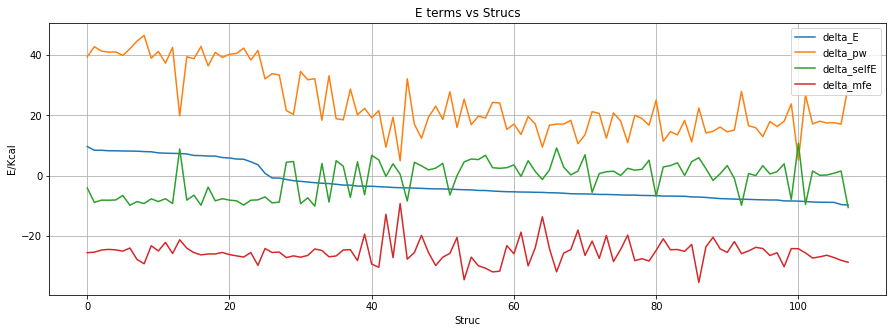

In [308]:
#plot the Energy terms vs structure
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

#marker= ['^','o','v','X','s','*','<']
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
sorted_data=sorted(list(zip(*data)), key= lambda x: x[3], reverse=True)
#print(sorted_data)
sorted_data=list(zip(*sorted_data))
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
for i,datai in enumerate(sorted_data[3:]):    
    plt.plot(datai,label= labels[i], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True)
plt.show()

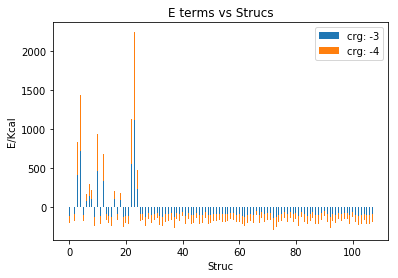

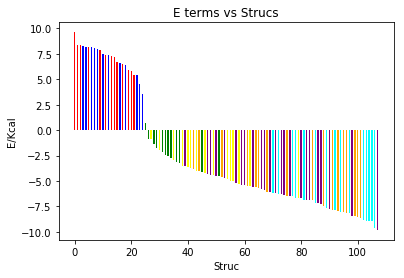

In [309]:
labels=["-3", "-4"]
width=0.35
#print(sorted_data[1:3][0][0],sorted_data[1:3][1][0] )
p1 = plt.bar(list(range(len(sorted_data[1]))), sorted_data[1], width)
p2 = plt.bar(list(range(len(sorted_data[2]))), sorted_data[2], width, sorted_data[1] )
plt.legend((p1[0], p2[0]), ('crg: -3', 'crg: -4'))
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
#plt.grid(True)
plt.show()

##color each structure
color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
color_label=["orange","purple", "green","cyan","yellow","red","blue"]
colors=[]
for j in range(len(sorted_data[0])):
    for key, value in color_map.items(): 
        if key in sorted_data[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data[0][j] for key in color_map):
        colors.append("blue")


outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#another way to show gap
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.figure()
#plt.figure(figsize=(15, 5))
plt.bar(list(range(len(sorted_data[3]))), sorted_data[3], width=0.5, color=colors )
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')



#plt.grid(True)
plt.savefig(outputpathway+'/'+'All_strucs_dE_ba3_clustering_f3.png', dpi=300)
plt.show()


108
[1.5, 14.5, 15.5, 56.5, 68.5]
['0101-10', '010000', '01-1100', '001000', '000100', '000010']


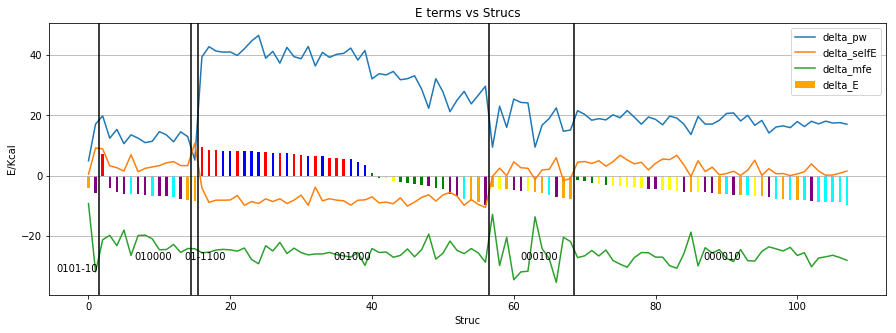

In [310]:
#category by which residue get protonated
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4, E3_crgstate, E4_crgstate, diff_crgstate, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
#print(len(data[4]))

sorted_data2=sorted(list(zip(*data)), key= lambda x:(x[5], x[6]), reverse=True)
sorted_data2=list(zip(*sorted_data2))


##color each structure
color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}

colors=[]

for j in range(len(sorted_data2[0])):
    for key, value in color_map.items(): 
        if key in sorted_data2[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data2[0][j] for key in color_map):
        colors.append("blue")
print(len(colors))

#get the division line for each category
vlines=[]
vline_labels=[]
for i,x in enumerate(sorted_data2[5][:-1]):
    if sorted_data2[5][i] !=sorted_data2[5][i+1]:
        vlines.append(i+0.5)
        vline_labels.append(sorted_data2[5][i])
vline_labels.append(sorted_data2[5][-1])
print(vlines)
print(vline_labels)

labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.bar(list(range(len(sorted_data2[6]))), sorted_data2[6], width, label= labels[0], color=colors)
for i,datai in enumerate(sorted_data2[7:]):    
    plt.plot(datai,label= labels[i+1], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
for i, xc in enumerate(vlines):
    plt.axvline(x=xc, color='k', linestyle='-')
    if i==0: plt.text(vlines[i]-6,-32,vline_labels[i])
    else: plt.text((vlines[i-1]+vlines[i])/2-1.5,-28,vline_labels[i])
plt.text((len(sorted_data2[6])+vlines[-1])/2-1.5,-28,vline_labels[-1])
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True, axis='y')
plt.savefig(outputpathway+'/'+'All_strucs_cat_E_clustering_f3.png', dpi=300)
plt.show()


# 20190528 plot crg of pls vs redox state for structures： 
# 3eh4 13.7607421875 (change to 3s8f)
# d372ph376p_166_frame 12.508026123046903
# d372p_151_frame 5.60295867919919
# p3_443_frame 2.9347839355469034
# p4_32_frame -2.2773284912109375
# p1_428_frame -4.098793029785156
# at one graph

In [311]:
#import data files
f1 = pandas.read_csv(r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip\clustering\PLS\crg_detail_ba3_clustering_PLS_allexcludepls.csv")
f2 = pandas.read_csv(r'C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip\free_no_water\allexcludepls\crg_detail_ba3_allexcludepls.csv')

In [312]:
#print(f1.loc[:,'RA0010':'FA3K9303'])
if f1.loc[:, 'RA0010':'FA3K9303'].equals(f1.iloc[:,1:117]):
    print('True')
print(f2.shape)

True
(144, 142)


In [313]:
#calculate sum of charges at PLS for each substate and each structures
f1['sum_pls']=f1.loc[:,'YA0065':'RA0450'].sum(axis=1)
f2['sum_pls']=f2.loc[:,'YA0065':'RA0450'].sum(axis=1)


In [314]:
#calculate sum of charges at allexcludePLS for each substate and each structures
f1['sum_allexcludepls']=f1.loc[:,'RA0010':'FA3K9303'].sum(axis=1)
f2['sum_allexcludepls']=f2.loc[:,'RA0010':'FA3K9303'].sum(axis=1)

In [315]:
#reshape the sum_pls, make 12 data one sturctue
n1=f1['sum_pls'].size
n2=f2['sum_pls'].size
d1_sum_pls=f1['sum_pls'].values.reshape([n1//12,12])
d2_sum_pls=f2['sum_pls'].values.reshape([n2//12,12])

In [316]:
#reshape the sum_allexcluedpls, make 12 data one sturctue
n11=f1['sum_allexcludepls'].size
n22=f2['sum_allexcludepls'].size
d1_sum_allexcludepls=f1['sum_allexcludepls'].values.reshape([n11//12,12])
d2_sum_allexcludepls=f2['sum_allexcludepls'].values.reshape([n22//12,12])

In [317]:
print(d1_sum_allexcludepls.shape)

(96, 12)


In [318]:
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]
states=[f1['state_snap'], f2['state_snap']]

color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
colors=[]
for i in range(len(states)):
    color=[]
    for j in range(0,len(states[i]), 12):
        for key, value in color_map.items(): 
            if key in states[i][j]:
                color.append(value)
                break
        if all(key not in states[i][j] for key in color_map):
            color.append("blue")
    colors.append(color)

print(len(colors[1]))



12


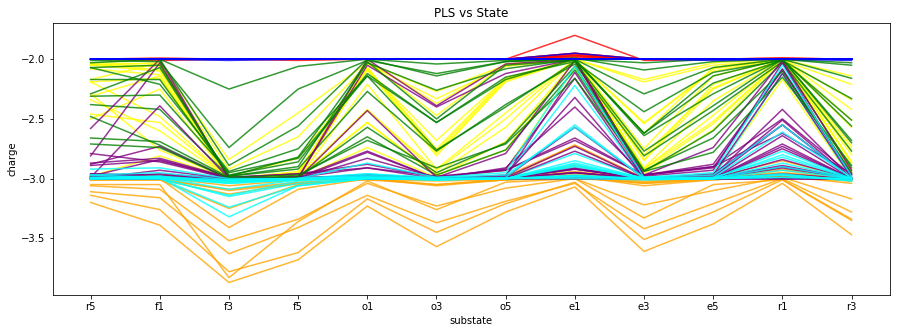

In [319]:
#plot the pls crg set
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#marker= ['^','o','v','X','s','*','<']
x_label=['r5','f1','f3','f5','o1','o3','o5','e1','e3','e5','r1', 'r3']

plt.figure()
plt.figure(figsize=(15, 5))
plt.xticks(list(range(12)),x_label)
data=[d1_sum_pls,d2_sum_pls]
for i,datai in enumerate(data):
    for j, struc in enumerate(datai):     
        plt.plot(struc,label=str(i)+str(j), alpha=0.8, color=colors[i][j])
        #plt.legend()
        #plt.ylim(-5.0,2.0)
plt.title('PLS vs State')
plt.xlabel('substate')
plt.ylabel('charge')
#plt.savefig(outputpathway+'/'+'All_Crg_State_ba3_clustering_selected_strucs.png', dpi=300)
plt.show()

#plt.clf()

#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

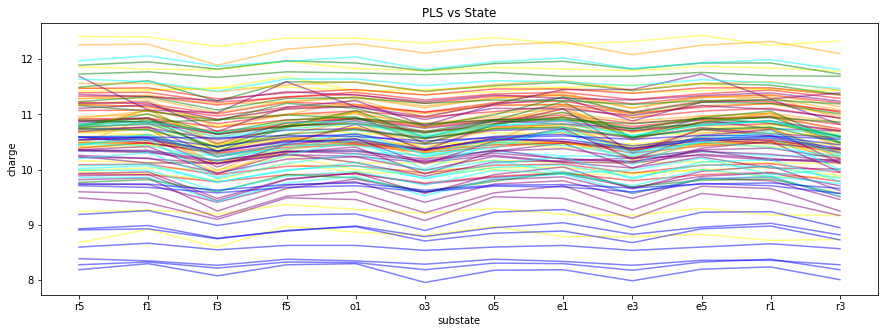

In [320]:
#plot the pls crg set
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#marker= ['^','o','v','X','s','*','<']
x_label=['r5','f1','f3','f5','o1','o3','o5','e1','e3','e5','r1', 'r3']

plt.figure()
plt.figure(figsize=(15, 5))
plt.xticks(list(range(12)),x_label)
data=[d1_sum_allexcludepls,d2_sum_allexcludepls]
for i,datai in enumerate(data):
    for j, struc in enumerate(datai):     
        plt.plot(struc,label=str(i)+str(j), alpha=0.5, color=colors[i][j])
        #plt.legend()
        #plt.ylim(-5.0,2.0)
plt.title('PLS vs State')
plt.xlabel('substate')
plt.ylabel('charge')
#plt.savefig(outputpathway+'/'+'All_Crg_State_ba3_clustering_selected_strucs.png', dpi=300)
plt.show()

#plt.clf()

#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

In [321]:
#print residues that have charge changed


def find_special_res(df, res_dict):
    res_dict=collections.defaultdict(set)
    for key, value in df.iloc[:,1:-11].items():
        #print(set(value))
        res_dict[key]=set(value)
    
find_special_res(f1, f1_values)
find_special_res(f2,f2_values)
    


special_res=set() # strore residues that have charge changed: max(crg)-min(crg)>0.2
#MD data
for key,value in f1_values.items():
    if len(value)>1 and max(value)-min(value)>0.2:
        print(key, value)
        special_res.add(key)
        
#Xray data
print('\nxray data:')
for key,value in f2_values.items():
    if len(value)>1 and max(value)-min(value)>0.2:
        print(key, value)
        special_res.add(key)

YA0012 {-0.0, -0.18, -0.29, -0.3, -0.28, -0.31, -0.34, -0.37, -0.35, -0.06, -0.01, -0.07, -0.08, -0.02, -0.03, -0.17, -0.1, -0.09, -0.04, -0.36, -0.05, -0.11}
KA0019 {0.94, 1.0, 0.25, 0.75, 0.26, 0.76, 0.51, 0.54, 0.5, 0.69, 0.22, 0.23, 0.21, 0.79, 0.38, 0.88, 0.13, 0.97, 0.72, 0.47, 0.18, 0.19, 0.44, 0.2, 0.45, 0.46, 0.42, 0.43, 0.67, 0.35, 0.85, 0.17, 0.15, 0.16, 0.8, 0.55, 0.39, 0.14, 0.89, 0.98, 0.73, 0.48, 0.82, 0.62, 0.6, 0.57, 0.59, 0.58, 0.64, 0.65, 0.63, 0.92, 0.84, 0.93, 0.68, 0.27, 0.52, 0.77, 0.66, 0.36, 0.86, 0.61, 0.95, 0.7, 0.09, 0.08, 0.81, 0.56, 0.9, 0.99, 0.24, 0.74, 0.83, 0.07, 0.34, 0.29, 0.3, 0.31, 0.06, 0.32, 0.33, 0.05, 0.04, 0.28, 0.78, 0.53, 0.37, 0.87, 0.12, 0.03, 0.96, 0.71, 0.91}
KA0171 {0.97, 1.0, 0.85, 0.98, 0.99, 0.88, 0.86, 0.87, 0.74, 0.77, 0.73, 0.75, 0.76, 0.78, 0.72}
EA0203 {-0.0, -0.28, -0.25, -0.5, -0.49, -0.74, -0.24, -0.75, -0.48, -0.73, -0.91, -0.01, -0.02, -0.03, -0.71, -0.62, -0.87, -0.37, -0.04, -0.53, -0.05, -0.06, -0.07, -0.34, -0.33, -0.32

In [322]:
print(f1_values['YA0244'], f2_values['YA0244'])
print(f1_values['YA0248'], f2_values['YA0248'])


{-0.0} {-0.0}
{-0.0} {-0.0}


In [323]:
#write out the special residue list
outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
with open(outputpathway+r'\special_res.lst','w+') as f:
    for x in special_res:
        f.write(x+'\n')

In [324]:
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]
#selected_strucs=['3s8f','d372ph376p_166_frame','d372p_151_frame','p3_443_frame','p4_32_frame','p1_428_frame']

#3eh4 13.7607421875 / 3s8f 12.734191894531193
## d372ph376p_166_frame 12.508026123046903

## d372p_151_frame 5.60295867919919
## p2_139_frame 5.4574127197265625
## p3_435_frame 5.152229309082031
## d372p_207_frame 4.920989990234375
## p2_145_frame 4.561737060546918
## d372p_253_frame 4.328987121582031
## p3_98_frame 3.5489120483399006
## p3_443_frame 2.9347839355469034
## p3_226_frame 1.7583389282226562
## p2_25_frame 1.2615890502929688

## p4_153_frame 0.41042327880860796

##p2_277_frame 0.12345886230470171


## p2_185_frame -0.3127593994140625
## p2_432_frame -1.0724716186524006

## p4_32_frame -2.2773284912109375
## p1_188_frame -3.1038818359375

## p1_428_frame -4.098793029785156
selected_strucs=['3s8f','d372ph376p_166_frame','d372p_151_frame','p2_139_frame','d372p_207_frame',\
                 'p2_145_frame','d372p_253_frame','p3_98_frame','p3_443_frame','p3_226_frame','p4_153_frame',\
                'p2_185_frame','p2_432_frame','p4_32_frame','p1_188_frame','p1_428_frame','p2_277_frame', 'p2_25_frame']
selected_strucs_pointer={}


states=[f1['state_snap'], f2['state_snap']]

color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
colors={}
for i in range(len(states)):
    for j in range(0,len(states[i]), 12):
        struc=states[i][j][:-3]
        if struc not in selected_strucs: continue
        selected_strucs_pointer[struc]=[i,j//12]
        #print(struc)
        for key, value in color_map.items(): 
            if key in states[i][j]:
                colors[struc]=value
                break
        if all(key not in states[i][j] for key in color_map):
            colors[struc]="blue"

print(colors)
print(selected_strucs_pointer)


{'d372p_151_frame': 'yellow', 'd372p_207_frame': 'yellow', 'd372p_253_frame': 'yellow', 'd372ph376p_166_frame': 'red', 'p1_428_frame': 'orange', 'p2_25_frame': 'purple', 'p1_188_frame': 'orange', 'p2_139_frame': 'purple', 'p2_145_frame': 'purple', 'p2_185_frame': 'purple', 'p2_277_frame': 'purple', 'p2_432_frame': 'purple', 'p3_226_frame': 'green', 'p3_443_frame': 'green', 'p3_98_frame': 'green', 'p4_153_frame': 'cyan', 'p4_32_frame': 'cyan', '3s8f': 'blue'}
{'d372p_151_frame': [0, 0], 'd372p_207_frame': [0, 5], 'd372p_253_frame': [0, 7], 'd372ph376p_166_frame': [0, 16], 'p1_428_frame': [0, 29], 'p2_25_frame': [0, 30], 'p1_188_frame': [0, 37], 'p2_139_frame': [0, 53], 'p2_145_frame': [0, 54], 'p2_185_frame': [0, 56], 'p2_277_frame': [0, 60], 'p2_432_frame': [0, 67], 'p3_226_frame': [0, 77], 'p3_443_frame': [0, 80], 'p3_98_frame': [0, 82], 'p4_153_frame': [0, 86], 'p4_32_frame': [0, 92], '3s8f': [1, 11]}


In [325]:
# sum_pls and sum_allexcludepls data for selected_strucs
data_sum_pls=[d1_sum_pls,d2_sum_pls]
data_sum_allexcludepls =[d1_sum_allexcludepls, d2_sum_allexcludepls]

def selecte_strucs_data(d1,d2, selected_strucs, selected_strucs_pointer):
    data=[d1,d2]
    res={}
    for struc in selected_strucs:
        i, j =selected_strucs_pointer[struc][0],selected_strucs_pointer[struc][1]
        #print(data[selected_strucs_pointer[struc][0]][selected_strucs_pointer[struc][1]])
        res[struc]=data[i][j]
    return res

selected_sum_pls=selecte_strucs_data(d1_sum_pls, d2_sum_pls, selected_strucs, selected_strucs_pointer)
selected_sum_allexcludepls=selecte_strucs_data(d1_sum_allexcludepls,d2_sum_allexcludepls, selected_strucs, selected_strucs_pointer)
            

In [326]:
print(selected_sum_allexcludepls)

{'3s8f': array([9.71, 9.68, 9.58, 9.68, 9.71, 9.6 , 9.7 , 9.69, 9.6 , 9.75, 9.71,
       9.57]), 'd372ph376p_166_frame': array([11.07, 11.08, 10.83, 11.  , 11.06, 10.95, 11.05, 11.15, 10.94,
       11.06, 11.11, 10.93]), 'd372p_151_frame': array([10.68, 10.63, 10.69, 10.81, 10.65, 10.63, 10.67, 10.65, 10.62,
       10.66, 10.67, 10.6 ]), 'p2_139_frame': array([10.24, 10.12, 10.12, 10.28, 10.13,  9.88, 10.14, 10.16, 10.21,
       10.26, 10.17, 10.15]), 'd372p_207_frame': array([10.16, 10.13, 10.15, 10.29, 10.12, 10.12, 10.17, 10.13, 10.13,
       10.14, 10.12, 10.11]), 'p2_145_frame': array([11.69, 11.08, 11.03, 11.59, 11.14, 10.96, 11.19, 11.45, 11.45,
       11.73, 11.28, 11.39]), 'd372p_253_frame': array([10.41, 10.42, 10.46, 10.63, 10.44, 10.47, 10.49, 10.48, 10.4 ,
       10.45, 10.49, 10.29]), 'p3_98_frame': array([9.77, 9.82, 9.6 , 9.91, 9.85, 9.6 , 9.79, 9.96, 9.69, 9.81, 9.83,
       9.57]), 'p3_443_frame': array([10.76, 10.84, 10.4 , 10.8 , 10.83, 10.66, 10.83, 10.95, 10.74,
 

In [327]:
# get impose charge
impose_charge=[-1,-1,0,-1,-1,0,-1, -1,0,-1,-1,0]


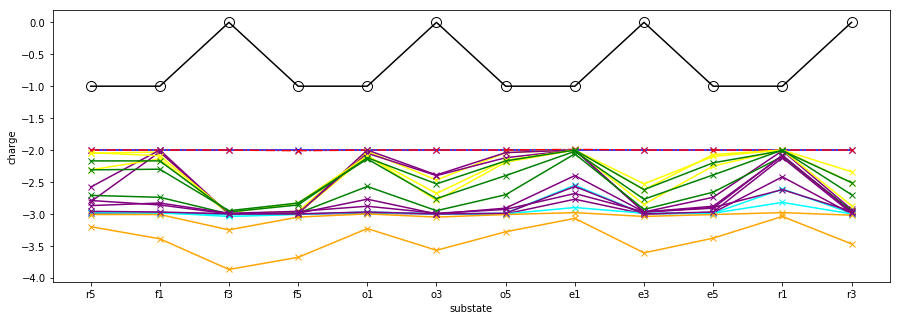

In [338]:
#plot the pls crg set
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

def decrease_base(base_line: float, data:dict):
    res={}
    for key, value in data.items():
        new_list=[x+base_line for x in value]
        res[key]=new_list
    return res

selected_sum_allexcludepls_scale=decrease_base(-10, selected_sum_allexcludepls)
#print(selected_sum_allexcludepls_scale)


outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#marker= ['^','o','v','X','s','*','<']
x_label=['r5','f1','f3','f5','o1','o3','o5','e1','e3','e5','r1', 'r3']

plt.figure()
plt.figure(figsize=(15, 5))
plt.xticks(list(range(12)),x_label)

for struc in selected_strucs:
    #if struc != 'p2_25_frame': continue
    if 'd372ph376p' in struc: plt.plot(selected_sum_pls[struc], label=struc+'pls', alpha=1, color=colors[struc], marker='x',linestyle='-.')
    else:
        plt.plot(selected_sum_pls[struc], label=struc+'pls', alpha=1, color=colors[struc], marker='x')
        #plt.plot(selected_sum_allexcludepls_scale[struc], label=struc+'excludepls', alpha=1, color=colors[struc],marker='o')

plt.plot(impose_charge, label='impose_charge', alpha=1, color='k', marker='o', markersize=10, markerfacecolor='none')

#plt.legend()
plt.xlabel('substate')
plt.ylabel('charge')
plt.savefig(outputpathway+'/'+'All_Crg_State_ba3_clustering_selected_strucs.png', dpi=300)
plt.show()

#plt.clf()

#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

In [216]:
d1_sum_pls

array([[-2.05, -2.03, -3.  , ..., -2.07, -2.  , -2.51],
       [-2.19, -2.16, -3.  , ..., -2.21, -2.  , -2.76],
       [-2.19, -2.48, -3.  , ..., -2.35, -2.  , -2.8 ],
       ...,
       [-3.  , -3.  , -3.04, ..., -3.  , -2.99, -3.  ],
       [-2.99, -2.99, -3.03, ..., -3.  , -2.93, -3.  ],
       [-3.  , -2.99, -3.09, ..., -3.  , -2.9 , -3.  ]])